# Identify Potential Customer Segments using RFM

In [24]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

In [25]:
data = pd.read_excel("Online_Retail.xlsx")

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Removing Duplicates

In [27]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

#### Data Insights

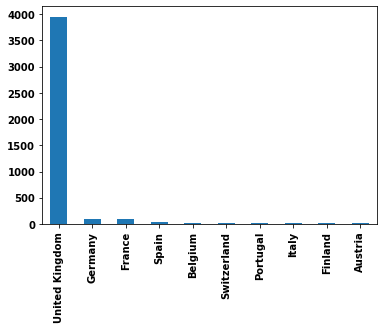

In [28]:
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [29]:
uk_data=data[data.Country=='United Kingdom']

In [30]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      495478 non-null object
StockCode      495478 non-null object
Description    494024 non-null object
Quantity       495478 non-null int64
InvoiceDate    495478 non-null datetime64[ns]
UnitPrice      495478 non-null float64
CustomerID     361878 non-null float64
Country        495478 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


In [31]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [32]:
uk_data = uk_data[(uk_data['Quantity']>0)]

In [33]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [34]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [35]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [36]:
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [37]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


#### RFM Analysis
Here, you are going to perform following opertaions:

  - For Recency, Calculate the number of days between present date and date of last purchase each customer.
  - For Frequency, Calculate the number of orders for each customer.
  - For Monetary, Calculate sum of purchase price for each customer.

In [38]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [40]:
rfm.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [41]:
rfm.columns=['monetary','recency','frequency']

In [42]:
rfm['recency'] = rfm['recency'].astype(int)

In [43]:
rfm.head()

,monetary,recency,frequency
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


#### Computing Quantile of RFM values
Customers with the lowest recency, highest frequency and monetary amounts considered top customers.

Split data into even buckets based upon three features.

In [44]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [45]:
rfm.head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,1
12747.0,2,103,4196.01,4,1,4
12748.0,0,4596,33719.73,4,1,4
12749.0,3,199,4090.88,4,1,4
12820.0,3,59,942.34,3,2,4


In [46]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,1,111
12747.0,2,103,4196.01,4,1,4,414
12748.0,0,4596,33719.73,4,1,4,414
12749.0,3,199,4090.88,4,1,4,414
12820.0,3,59,942.34,3,2,4,324


In [47]:
rfm.sort_values('RFM_Score', ascending=True)

,monetary,recency,frequency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,1,111
17152.0,194,14,1689.50,1,1,1,111
15098.0,182,3,39916.50,1,1,1,111
13135.0,196,1,3096.00,1,1,1,111
16754.0,372,2,2002.40,1,1,1,111
...,...,...,...,...,...,...,...
17360.0,17,132,585.79,4,3,4,434
16885.0,15,101,471.51,4,3,4,434
12970.0,7,151,452.24,4,3,4,434
